In [1]:
import pandas as pd
from darts import TimeSeries

In [2]:
df = pd.read_csv("MY1_2023.csv")

df

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,10-01-2023 20:00,503372.0,23.385867,38.066724,442.508711,0.000000,30.0,67.285714,14.428571,15.571429
1,10-01-2023 20:15,503383.0,23.250297,35.728543,503.089431,0.000000,30.0,68.133333,16.933333,18.933333
2,10-01-2023 20:30,503398.0,27.758007,36.726547,950.243902,0.000000,30.0,68.400000,17.666667,19.066667
3,10-01-2023 20:45,503413.0,26.571767,35.528942,1119.024390,4.166667,30.0,68.933333,19.200000,20.400000
4,10-01-2023 21:00,503428.0,24.673784,35.928144,950.569106,0.694444,30.0,69.200000,18.133333,19.133333
...,...,...,...,...,...,...,...,...,...,...
14689,12-06-2023 20:15,684018.0,7.829181,12.375250,105.040650,38.888889,31.0,58.000000,8.200000,9.266667
14690,12-06-2023 20:30,684033.0,7.591934,10.778443,107.967480,38.194444,31.0,58.533333,8.400000,9.066667
14691,12-06-2023 20:45,684048.0,5.931198,9.580838,111.869919,37.268519,31.0,58.600000,8.266667,9.000000
14692,12-06-2023 21:00,684063.0,7.117438,11.177645,112.520325,39.814815,31.0,59.000000,8.733333,9.400000


In [3]:
df1 = df
df1['Datetime'] = pd.to_datetime(df['Datetime'])

df1 = df.set_index('Datetime')
#df1
df2=df1.resample('1H').mean()
df2.reset_index(inplace = True)
df2.head()

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-01-02 00:00:00,533870.5,15.895611,21.906188,241.382114,0.0,29.266667,64.566667,6.200000,7.033333
1,2023-01-02 01:00:00,533930.5,21.767497,24.700599,382.845528,0.0,29.000000,68.350000,26.100000,33.833333
2,2023-01-02 02:00:00,533990.5,14.234875,21.457086,179.756098,0.0,28.333333,67.816667,14.000000,17.200000
3,2023-01-02 03:00:00,534050.5,16.666667,21.956088,266.097561,0.0,28.816667,68.583333,12.933333,14.550000
4,2023-01-02 04:00:00,534110.5,9.905101,19.461078,87.642276,0.0,28.550000,67.583333,7.116667,8.083333


In [4]:
df2.isnull().sum()

Datetime       0
id          4460
field1      4460
field2      4460
field3      4460
field4      4460
field5      4460
field6      4460
field7      4460
field8      4460
dtype: int64

In [5]:
df2.interpolate(method='bfill', inplace=True)
df2

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-01-02 00:00:00,533870.5,15.895611,21.906188,241.382114,0.000000,29.266667,64.566667,6.200000,7.033333
1,2023-01-02 01:00:00,533930.5,21.767497,24.700599,382.845528,0.000000,29.000000,68.350000,26.100000,33.833333
2,2023-01-02 02:00:00,533990.5,14.234875,21.457086,179.756098,0.000000,28.333333,67.816667,14.000000,17.200000
3,2023-01-02 03:00:00,534050.5,16.666667,21.956088,266.097561,0.000000,28.816667,68.583333,12.933333,14.550000
4,2023-01-02 04:00:00,534110.5,9.905101,19.461078,87.642276,0.000000,28.550000,67.583333,7.116667,8.083333
...,...,...,...,...,...,...,...,...,...,...
8129,2023-12-06 17:00:00,683845.5,7.295374,12.175649,73.170732,8.796296,28.266667,46.700000,10.900000,11.500000
8130,2023-12-06 18:00:00,683905.5,12.277580,15.019960,99.430894,26.388889,29.966667,53.433333,11.150000,11.600000
8131,2023-12-06 19:00:00,683965.5,10.438909,11.976048,108.130081,34.780093,30.400000,56.816667,9.133333,9.533333
8132,2023-12-06 20:00:00,684025.5,7.473310,11.327345,108.211382,37.500000,31.000000,58.266667,8.433333,9.150000


In [6]:
print(df2.isnull().sum())

Datetime    0
id          0
field1      0
field2      0
field3      0
field4      0
field5      0
field6      0
field7      0
field8      0
dtype: int64


In [7]:
df = df2

target1 = 'field1'
test_l = 168
train_l = len(df) - test_l
date = 'Datetime'
# Create a TimeSeries, specifying the time and value columns
series1 = TimeSeries.from_dataframe(df, date, target1)

# Set aside the last 24 hours as a validation series
train1, val1 = series1[:train_l], series1[train_l:]

target2 = 'field2'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series2 = TimeSeries.from_dataframe(df, date, target2)

# Set aside the last 24 hours as a validation series
train2, val2 = series2[:train_l], series2[train_l:]

target3 = 'field3'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series3 = TimeSeries.from_dataframe(df, date, target3)

# Set aside the last 24 hours as a validation series
train3, val3 = series3[:train_l], series3[train_l:]

target4 = 'field4'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series4 = TimeSeries.from_dataframe(df, date, target4)

# Set aside the last 24 hours as a validation series
train4, val4 = series4[:train_l], series4[train_l:]

target7 = 'field7'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series7 = TimeSeries.from_dataframe(df, date, target7)

# Set aside the last 24 hours as a validation series
train7, val7 = series7[:train_l], series7[train_l:]

target8 = 'field8'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series8 = TimeSeries.from_dataframe(df, date, target8)

# Set aside the last 24 hours as a validation series
train8, val8 = series8[:train_l], series8[train_l:]

# VARIMA Model

In [8]:
from darts.models import VARIMA
import warnings
warnings.filterwarnings("ignore")

# Combine the target variables into a single multivariate series
multivariate_series = TimeSeries.from_dataframe(df, time_col=date, value_cols=[target1, target2, target3, target4, target7, target8])

# Set the hyperparameters for the VARIMA model
model_params = {
    'p': 1,    # Order of the autoregressive (AR) component
    'd': 0,    # Order of integration (should be 0 for stationary series)
    'q': 1,    # Order of the moving average (MA) component
}

# Create a VARIMA model for the multivariate series
model = VARIMA(**model_params)

# Train the model using the multivariate series
model.fit(multivariate_series)

# Evaluate the model on the validation data
val_pred = model.predict(len(val1))

# Print the validation predictions
print("Validation Predictions:")
print(val_pred)

# Make predictions for the test data
test_pred = model.predict(len(val1) + test_l)

# Print the test predictions
print("Test Predictions:")
print(test_pred)

# Make predictions for future time steps
future_pred = model.predict(24)

# Print the future predictions
print("Future Predictions:")
print(future_pred)


Validation Predictions:
<TimeSeries (DataArray) (Datetime: 168, component: 6, sample: 1)>
array([[[  7.02606594],
        [ 10.03511631],
        [151.47768163],
        [ 31.73831083],
        [  8.43184782],
        [  8.9494392 ]],

       [[  6.83525802],
        [  9.78110456],
        [186.53341479],
        [ 28.48764263],
        [  8.33367312],
        [  8.84509985]],

       [[  6.70242836],
        [  9.60654183],
        [215.89481795],
        [ 25.66004383],
        [  8.22793427],
        [  8.73472095]],
...
       [[  3.21364488],
        [  4.47494781],
        [142.80542762],
        [  2.13248811],
        [  3.37400146],
        [  3.82013989]],

       [[  3.19578107],
        [  4.45022126],
        [141.94340025],
        [  2.11746017],
        [  3.35547687],
        [  3.79920453]],

       [[  3.17801707],
        [  4.42563023],
        [141.08712483],
        [  2.10255916],
        [  3.33704867],
        [  3.77837654]]])
Coordinates:
  * Datetime   (Da

In [18]:
from darts.metrics import mape, rmse, mae
import numpy as np
import pandas as pd

# ... (previous code)

# Calculate the RMSE, MAE, and MAPE for each target variable
target_columns = [target1, target2, target3, target4, target7, target8]

# Convert validation and test predictions to DataFrames
val_pred_df = val_pred.pd_dataframe()
test_pred_df = test_pred.pd_dataframe()

# Extract the true values for validation and test datasets
val_true_df = df[-len(val1):][[date] + target_columns]
test_true_df = df[-(len(val1) + test_l):][[date] + target_columns]

# Merge the true values with the corresponding predictions on the 'Datetime' column
val_true_pred_df = pd.merge(val_true_df, val_pred_df, on=date, suffixes=('_true', '_pred'))
test_true_pred_df = pd.merge(test_true_df, test_pred_df, on=date, suffixes=('_true', '_pred'))

# Calculate RMSE, MAE, and MAPE functions
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate RMSE, MAE, and MAPE for each target variable
val_rmse = [calculate_rmse(val_true_pred_df[col + '_true'], val_true_pred_df[col + '_pred']) for col in target_columns]
test_rmse = [calculate_rmse(test_true_pred_df[col + '_true'], test_true_pred_df[col + '_pred']) for col in target_columns]

val_mae = [calculate_mae(val_true_pred_df[col + '_true'], val_true_pred_df[col + '_pred']) for col in target_columns]
test_mae = [calculate_mae(test_true_pred_df[col + '_true'], test_true_pred_df[col + '_pred']) for col in target_columns]

val_mape = [calculate_mape(val_true_pred_df[col + '_true'], val_true_pred_df[col + '_pred']) for col in target_columns]
test_mape = [calculate_mape(test_true_pred_df[col + '_true'], test_true_pred_df[col + '_pred']) for col in target_columns]

# Create a DataFrame to store the results
results_dict = {
    'Target': target_columns,
    'Val_RMSE': val_rmse,
    'Test_RMSE': test_rmse,
    'Val_MAE': val_mae,
    'Test_MAE': test_mae,
    'Val_MAPE': val_mape,
    'Test_MAPE': test_mape
}
results_df = pd.DataFrame(results_dict)

# Save the results to a CSV file
results_df.to_csv('Varima_2.csv', index=False)

print(results_df)


   Target  Val_RMSE  Test_RMSE  Val_MAE  Test_MAE  Val_MAPE  Test_MAPE
0  field1       NaN        NaN      NaN       NaN       NaN        NaN
1  field2       NaN        NaN      NaN       NaN       NaN        NaN
2  field3       NaN        NaN      NaN       NaN       NaN        NaN
3  field4       NaN        NaN      NaN       NaN       NaN        NaN
4  field7       NaN        NaN      NaN       NaN       NaN        NaN
5  field8       NaN        NaN      NaN       NaN       NaN        NaN


In [9]:
# from sklearn.metrics import mean_absolute_error
# import matplotlib.pyplot as plt

# #mean_absolute_error(val,pred)
# plt.rcParams['figure.figsize'] = [30, 30]
# val_data.plot()
# predictions.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
# plt.legend()
# plt.show()

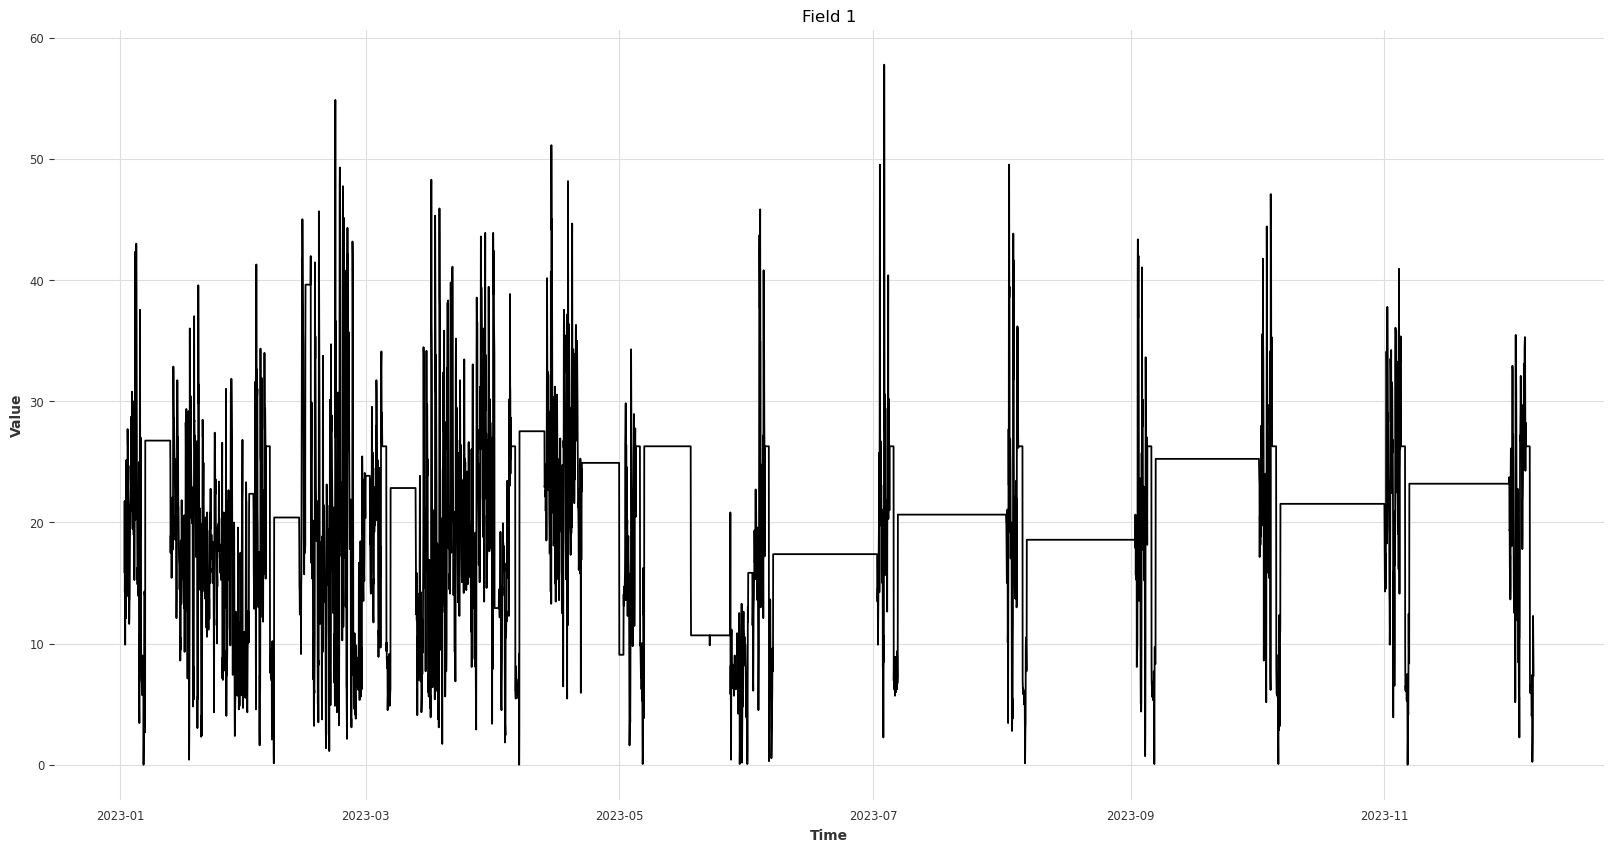

In [10]:
import matplotlib.pyplot as plt

# Plotting the 'field1' variable
plt.figure(figsize=(20, 10))
plt.plot(df['Datetime'], df['field1'])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Field 1')
plt.show()

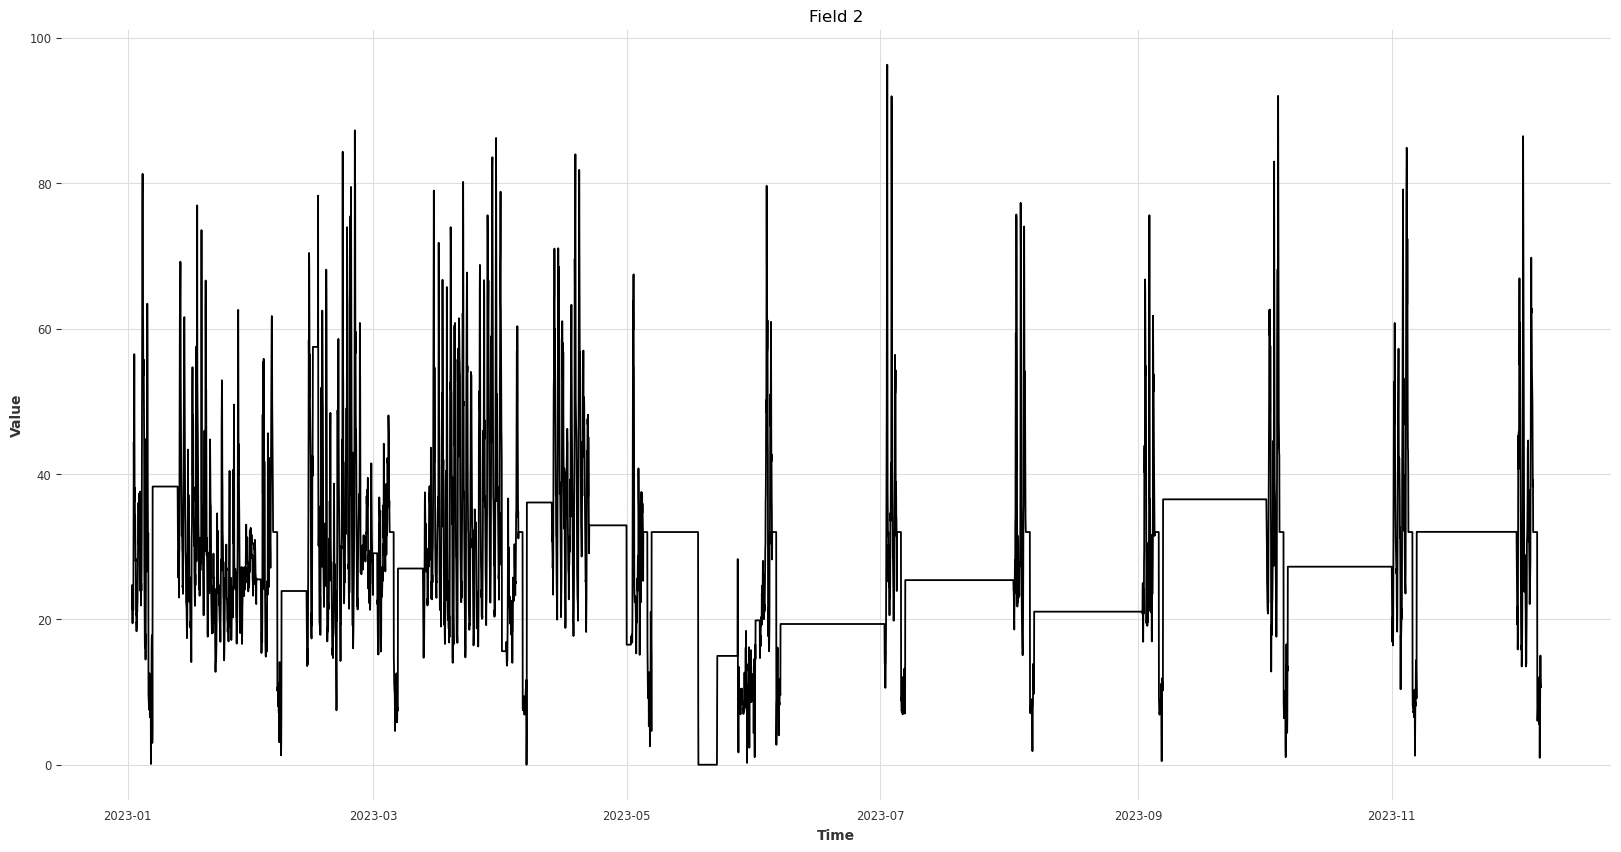

In [11]:
# Plotting the 'field2' variable
plt.figure(figsize=(20, 10))
plt.plot(df['Datetime'], df['field2'])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Field 2')
plt.show()

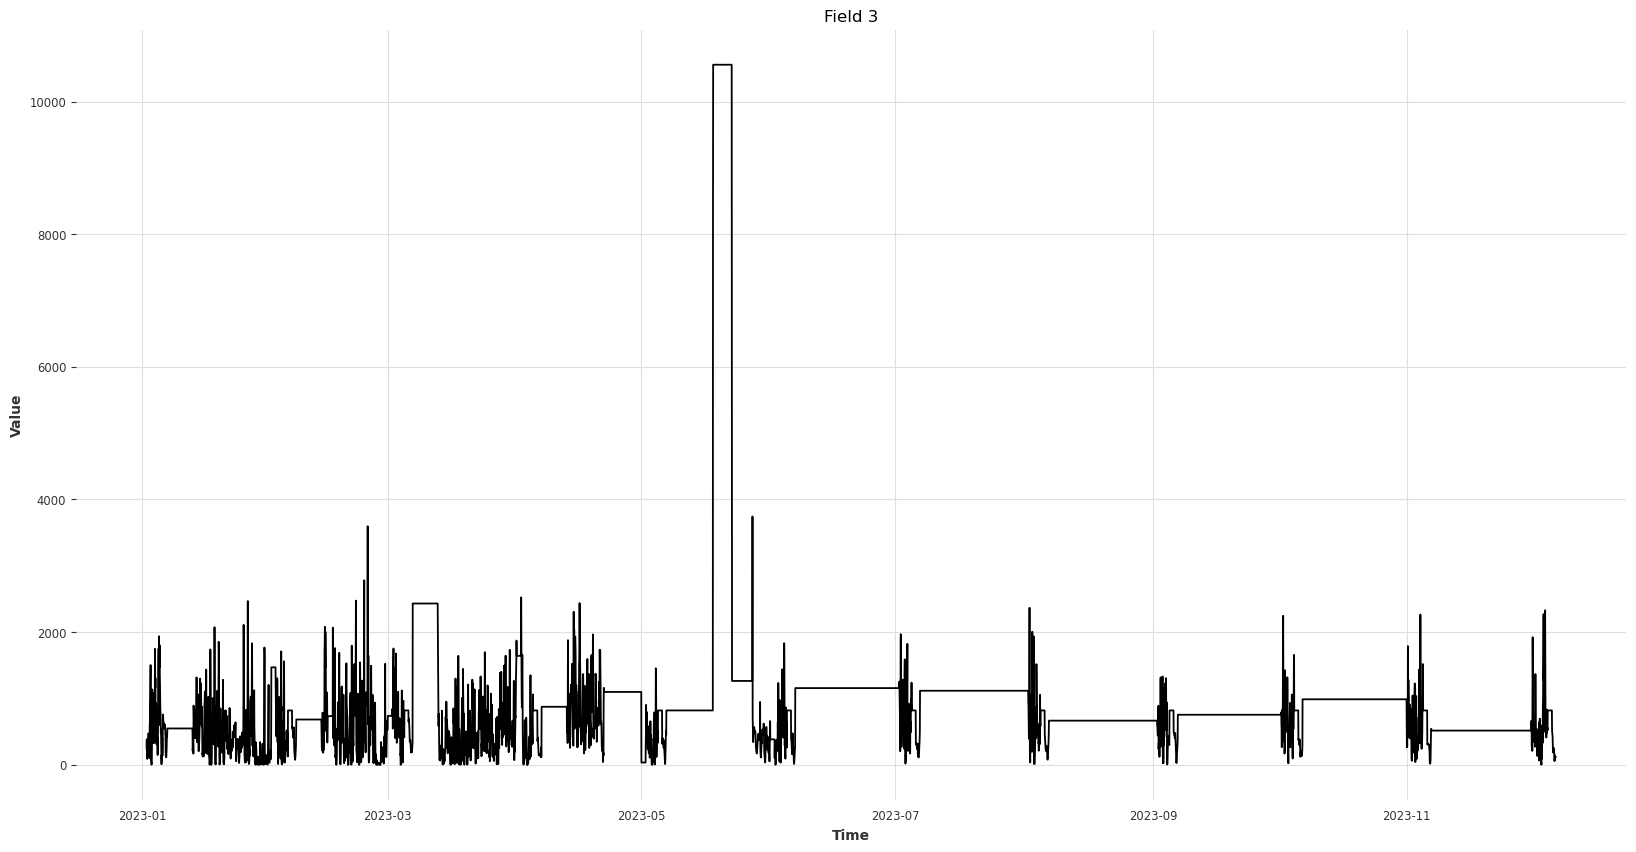

In [12]:
# Plotting the 'field3' variable
plt.figure(figsize=(20, 10))
plt.plot(df['Datetime'], df['field3'])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Field 3')
plt.show()

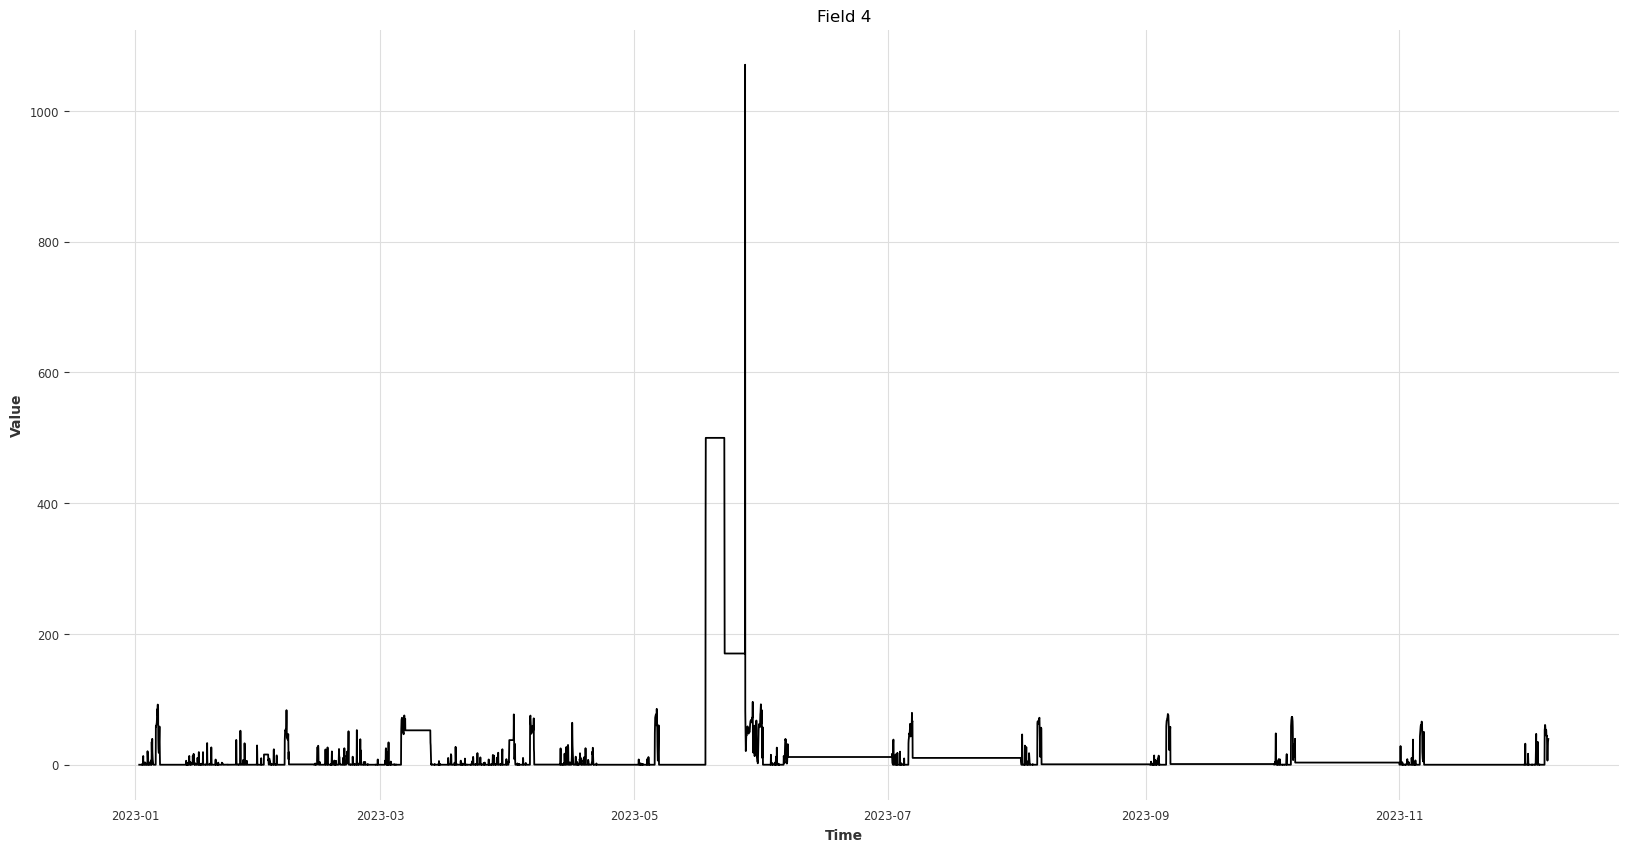

In [13]:
# Plotting the 'field4' variable
plt.figure(figsize=(20, 10))
plt.plot(df['Datetime'], df['field4'])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Field 4')
plt.show()

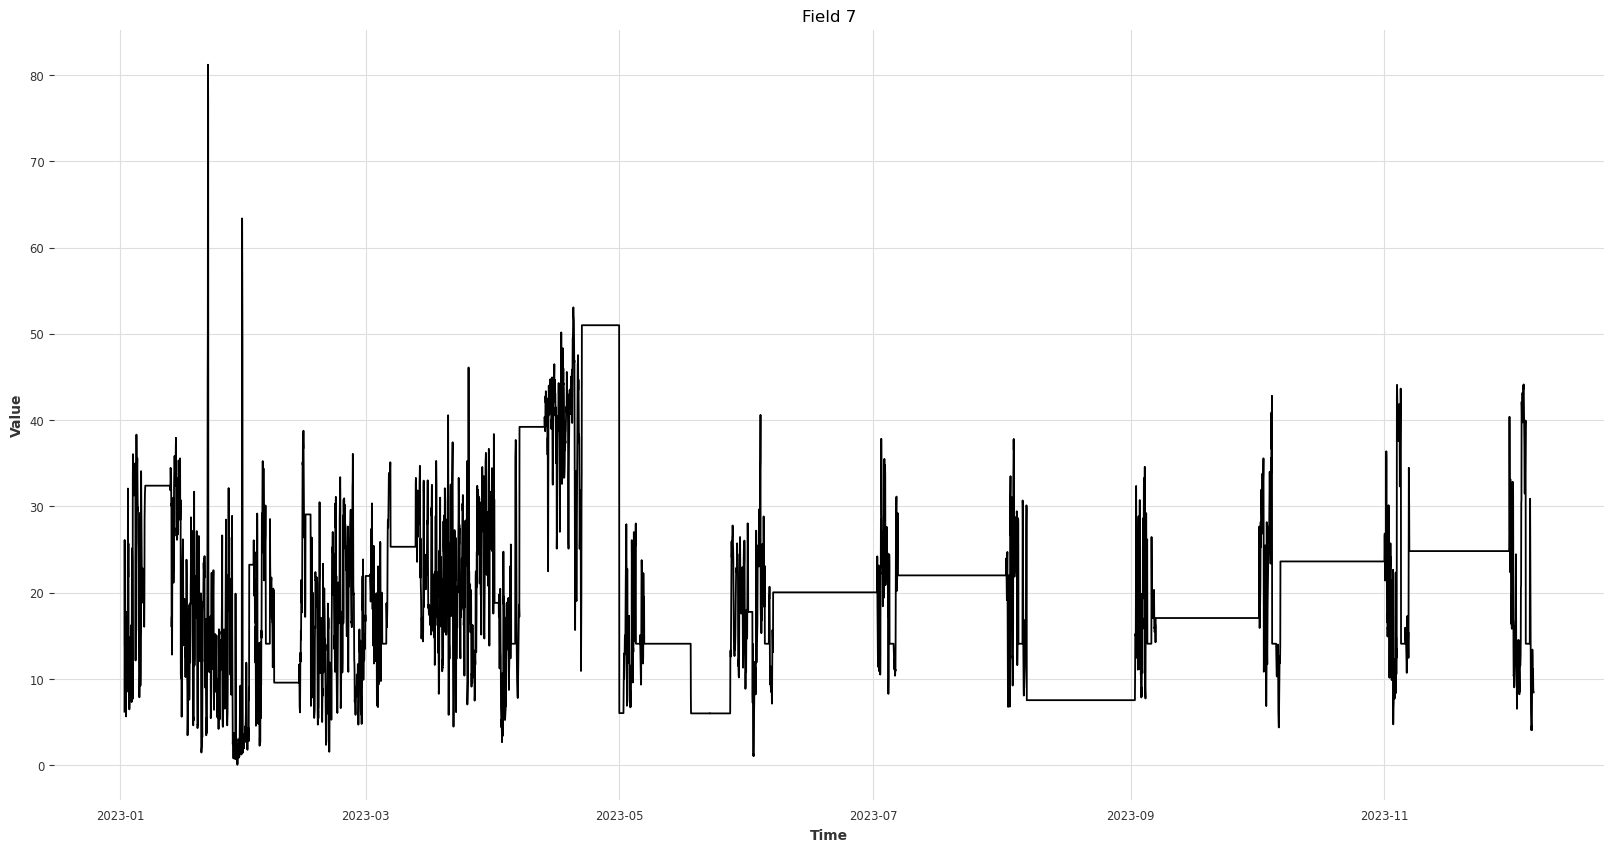

In [14]:
# Plotting the 'field7' variable
plt.figure(figsize=(20, 10))
plt.plot(df['Datetime'], df['field7'])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Field 7')
plt.show()

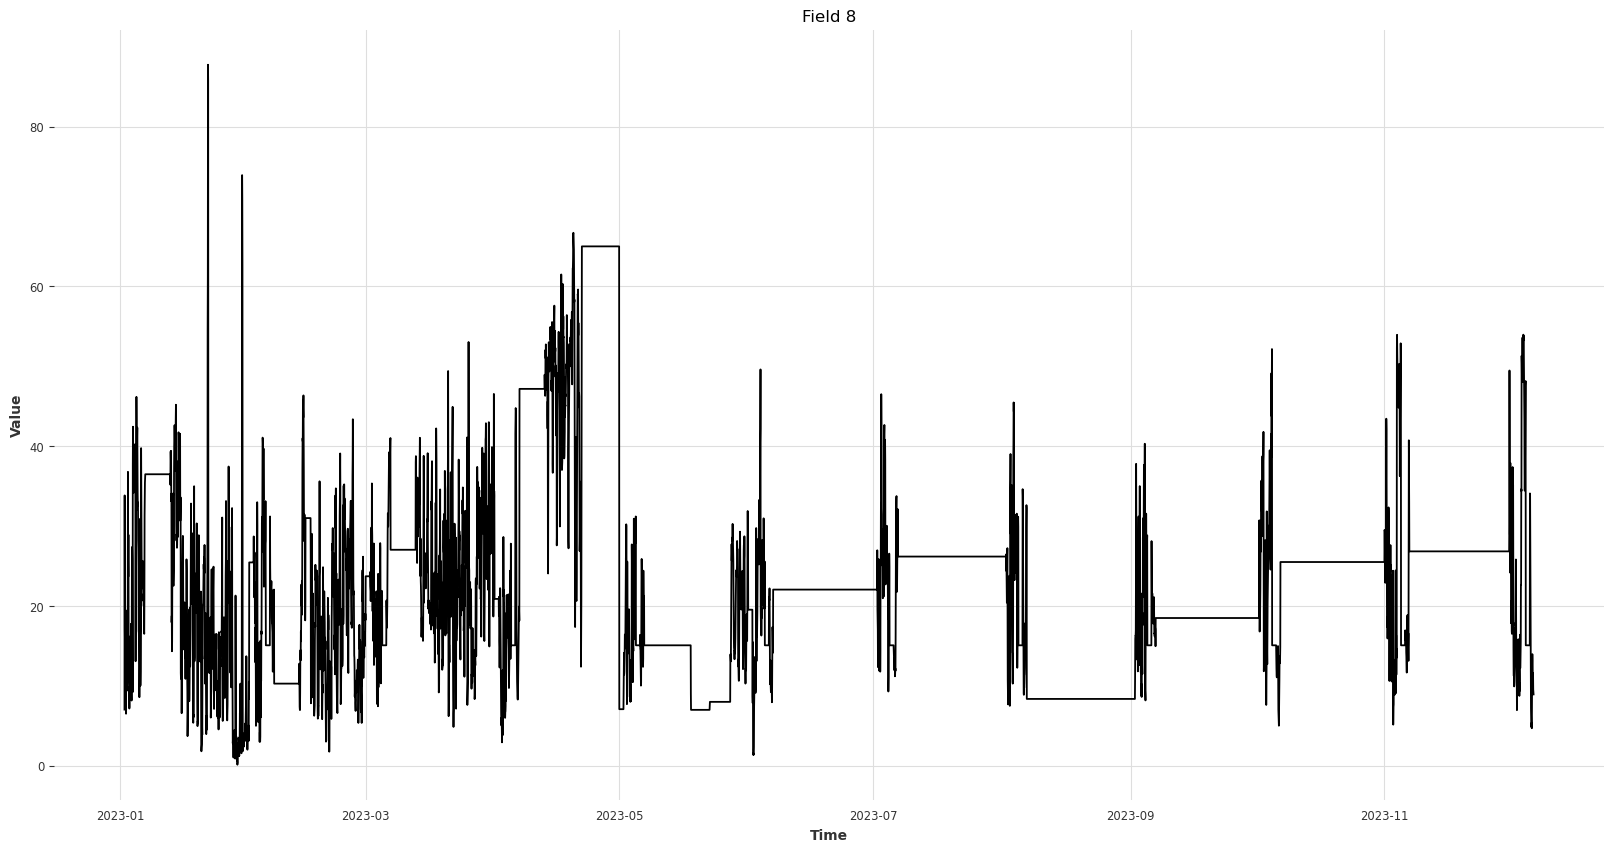

In [15]:
# Plotting the 'field8' variable
plt.figure(figsize=(20, 10))
plt.plot(df['Datetime'], df['field8'])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Field 8')
plt.show()